<a href="https://colab.research.google.com/github/2312058/Joy-s/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('IRIS.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.isnull().sum()



,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:

df.columns = df.columns.str.strip()


print("✅ Cleaned column names:")
for col in df.columns:
    print(f"'{col}'")


if 'Species' not in df.columns:
    df.rename(columns={df.columns[-1]: 'Species'}, inplace=True)
    print("✅ Renamed the last column to 'Species'")


print("\n🧾 Final column names:", df.columns.tolist())

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Species'] = label.fit_transform(df['Species'])

print("\n🌼 Encoded species classes:", list(label.classes_))
print("✅ Label encoding complete.")


✅ Cleaned column names:
'sepal_length'
'sepal_width'
'petal_length'
'petal_width'
'Species'

🧾 Final column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Species']

🌼 Encoded species classes: [np.int64(0), np.int64(1), np.int64(2)]
✅ Label encoding complete.


In [ ]:
X = df.drop('Species', axis=1)
y = df['Species']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



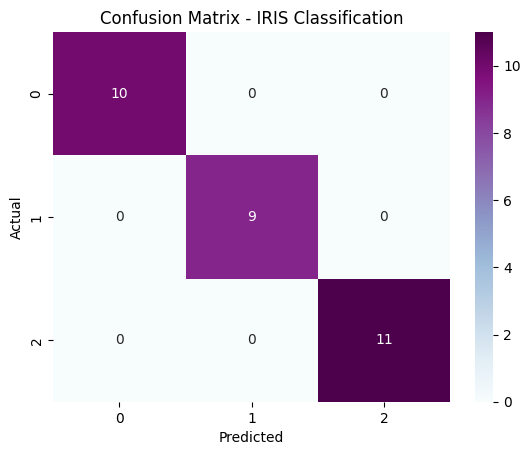

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', xticklabels=label.classes_, yticklabels=label.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - IRIS Classification')
plt.show()


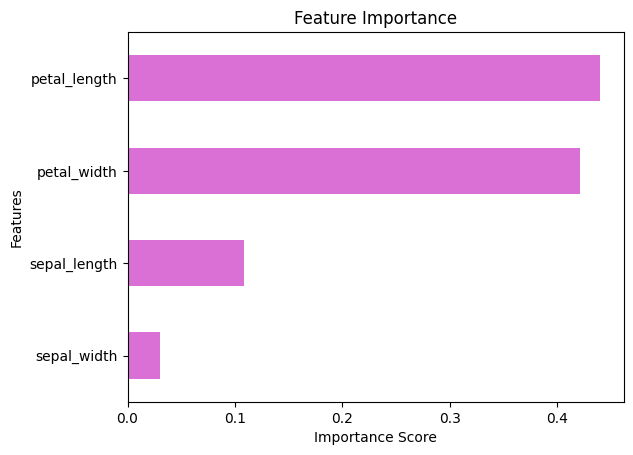

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='orchid')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
